### Regularized Linear Regression

- 다이아몬드의 특성을 회귀분석하여 예상 가격을 예측한다.

In [1]:
import pandas as pd

d_df = pd.read_csv('./datasets/diamond.csv')
d_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [2]:
d_df = d_df.drop(labels=['Unnamed: 0'], axis = 1)

In [3]:
d_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [4]:
# 투명도 등급을 숫자로 변환하는 함수
def clarity_to_numeric(clarity):
    clarity_order = {
        'IF': 8,
        'VVS1': 7,
        'VVS2': 6,
        'VS1': 5,
        'VS2': 4,
        'SI1': 3,
        'SI2': 2,
        'I1': 1
    }
    return clarity_order.get(clarity, None)


In [5]:
# 투명도 등급을 숫자로 변환한 열 추가
d_df.loc[:, 'clarity_level'] = d_df['clarity'].apply(clarity_to_numeric)
d_df

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_level
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2
...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,2
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64,2
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49,3
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43,3


In [6]:
def cut_to_numeric(cut):
    cut_order = {
        'Fair': 1,
        'Good': 2,
        'Very Good': 3,
        'Premium': 4,
        'Ideal': 5  # 가장 좋은 등급
    }
    return cut_order.get(cut, None)  # 잘못된 입력을 처리하기 위해 None 반환

In [7]:
d_df.loc[:, 'cut_level'] = d_df['cut'].apply(cut_to_numeric)
d_df

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_level,cut_level
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,4
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5,2
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,2,4
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64,2,5
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49,3,4
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43,3,4


In [8]:
def color_to_numeric(color):
    color_order = {
        'D': 7,  # 가장 투명한 색상
        'E': 6,
        'F': 5,
        'G': 4,
        'H': 3,
        'I': 2,
        'J': 1   # 가장 노란색에 가까운 색상
    }
    return color_order.get(color, None)  # 잘못된 입력을 처리하기 위해 None 반환

In [9]:
d_df.loc[:, 'color_level'] = d_df['color'].apply(color_to_numeric)
d_df

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_level,cut_level,color_level
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,5,6
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,4,6
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5,2,6
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,4,2
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,2,4,3
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64,2,5,7
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49,3,4,6
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43,3,4,5


In [10]:
pre_d_df = d_df.drop(labels= ['cut','clarity','color'], axis=1) 

In [11]:
pre_d_df

,carat,depth,table,price,x,y,z,clarity_level,cut_level,color_level
0,0.23,61.5,55.0,326,3.95,3.98,2.43,2,5,6
1,0.21,59.8,61.0,326,3.89,3.84,2.31,3,4,6
2,0.23,56.9,65.0,327,4.05,4.07,2.31,5,2,6
3,0.29,62.4,58.0,334,4.20,4.23,2.63,4,4,2
4,0.31,63.3,58.0,335,4.34,4.35,2.75,2,2,1
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,2,4,3
53939,0.75,62.2,55.0,2757,5.83,5.87,3.64,2,5,7
53940,0.71,60.5,55.0,2756,5.79,5.74,3.49,3,4,6
53941,0.71,59.8,62.0,2756,5.74,5.73,3.43,3,4,5


array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>,
        <Axes: title={'center': 'clarity_level'}>,
        <Axes: title={'center': 'cut_level'}>],
       [<Axes: title={'center': 'color_level'}>, <Axes: >, <Axes: >]],
      dtype=object)

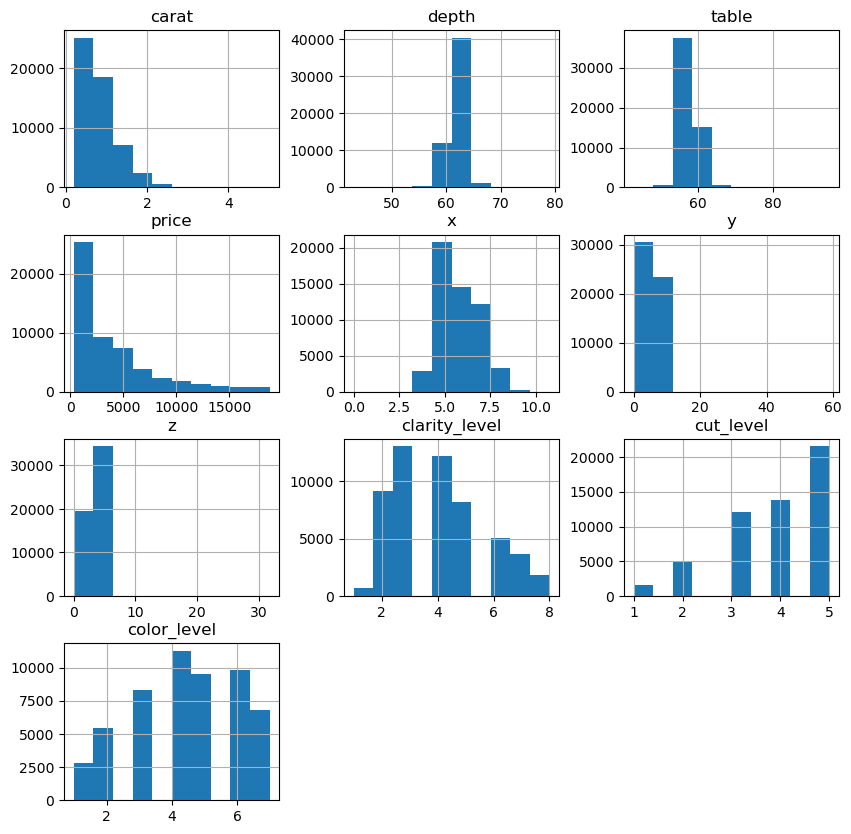

In [13]:
pre_d_df.hist(figsize = (10,10))

In [15]:
pre_d_df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53943.0,0.797935,0.473999,0.2,0.40,0.70,1.04,5.01
depth,53943.0,61.749322,1.432626,43.0,61.00,61.80,62.50,79.00
table,53943.0,57.457251,2.234549,43.0,56.00,57.00,59.00,95.00
price,53943.0,3932.734294,3989.338447,326.0,950.00,2401.00,5324.00,18823.00
x,53943.0,5.731158,1.121730,0.0,4.71,5.70,6.54,10.74
y,53943.0,5.734526,1.142103,0.0,4.72,5.71,6.54,58.90
z,53943.0,3.538730,0.705679,0.0,2.91,3.53,4.04,31.80
clarity_level,53943.0,4.050980,1.647103,1.0,3.00,4.00,5.00,8.00
cut_level,53943.0,3.904084,1.116576,1.0,3.00,4.00,5.00,5.00
color_level,53943.0,4.405873,1.701087,1.0,3.00,4.00,6.00,7.00


In [16]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
result = std.fit_transform(pre_d_df[['price']])

std_pre_d_df = pre_d_df.copy()
std_pre_d_df.loc[:, 'price'] = result

std_pre_d_df

,carat,depth,table,price,x,y,z,clarity_level,cut_level,color_level
0,0.23,61.5,55.0,-0.904102,3.95,3.98,2.43,2,5,6
1,0.21,59.8,61.0,-0.904102,3.89,3.84,2.31,3,4,6
2,0.23,56.9,65.0,-0.903851,4.05,4.07,2.31,5,2,6
3,0.29,62.4,58.0,-0.902096,4.20,4.23,2.63,4,4,2
4,0.31,63.3,58.0,-0.901846,4.34,4.35,2.75,2,2,1
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,61.0,58.0,-0.294722,6.15,6.12,3.74,2,4,3
53939,0.75,62.2,55.0,-0.294722,5.83,5.87,3.64,2,5,7
53940,0.71,60.5,55.0,-0.294973,5.79,5.74,3.49,3,4,6
53941,0.71,59.8,62.0,-0.294973,5.74,5.73,3.43,3,4,5


In [18]:
std_pre_d_df[std_pre_d_df.price.between(-1.96, 1.96)].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,50303.0,0.721913,0.381906,0.200000,0.38000,0.680000,1.010000,3.650000
depth,50303.0,61.755613,1.430744,43.000000,61.10000,61.800000,62.500000,79.000000
table,50303.0,57.421015,2.229608,43.000000,56.00000,57.000000,59.000000,79.000000
price,50303.0,-0.198160,0.686893,-0.904102,-0.75771,-0.448132,0.181301,1.959056
x,50303.0,5.579206,0.992015,0.000000,4.67000,5.580000,6.420000,9.540000
y,50303.0,5.582514,0.991126,0.000000,4.68000,5.570000,6.420000,31.800000
z,50303.0,3.446046,0.628755,0.000000,2.88000,3.420000,3.980000,31.800000
clarity_level,50303.0,4.077013,1.650521,1.000000,3.00000,4.000000,5.000000,8.000000
cut_level,50303.0,3.906208,1.122028,1.000000,3.00000,4.000000,5.000000,5.000000
color_level,50303.0,4.453194,1.689271,1.000000,3.00000,4.000000,6.000000,7.000000


In [19]:
std_pre_d_df = std_pre_d_df[std_pre_d_df.price.between(-1.96, 1.96)]
std_pre_d_df

,carat,depth,table,price,x,y,z,clarity_level,cut_level,color_level
0,0.23,61.5,55.0,-0.904102,3.95,3.98,2.43,2,5,6
1,0.21,59.8,61.0,-0.904102,3.89,3.84,2.31,3,4,6
2,0.23,56.9,65.0,-0.903851,4.05,4.07,2.31,5,2,6
3,0.29,62.4,58.0,-0.902096,4.20,4.23,2.63,4,4,2
4,0.31,63.3,58.0,-0.901846,4.34,4.35,2.75,2,2,1
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,61.0,58.0,-0.294722,6.15,6.12,3.74,2,4,3
53939,0.75,62.2,55.0,-0.294722,5.83,5.87,3.64,2,5,7
53940,0.71,60.5,55.0,-0.294973,5.79,5.74,3.49,3,4,6
53941,0.71,59.8,62.0,-0.294973,5.74,5.73,3.43,3,4,5


In [20]:
pre_d_df = pre_d_df.loc[std_pre_d_df.index].reset_index(drop=True)
pre_d_df

,carat,depth,table,price,x,y,z,clarity_level,cut_level,color_level
0,0.23,61.5,55.0,326,3.95,3.98,2.43,2,5,6
1,0.21,59.8,61.0,326,3.89,3.84,2.31,3,4,6
2,0.23,56.9,65.0,327,4.05,4.07,2.31,5,2,6
3,0.29,62.4,58.0,334,4.20,4.23,2.63,4,4,2
4,0.31,63.3,58.0,335,4.34,4.35,2.75,2,2,1
...,...,...,...,...,...,...,...,...,...,...
50298,0.86,61.0,58.0,2757,6.15,6.12,3.74,2,4,3
50299,0.75,62.2,55.0,2757,5.83,5.87,3.64,2,5,7
50300,0.71,60.5,55.0,2756,5.79,5.74,3.49,3,4,6
50301,0.71,59.8,62.0,2756,5.74,5.73,3.43,3,4,5


In [21]:
pre_d_df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,50303.0,0.721913,0.381906,0.2,0.38,0.68,1.01,3.65
depth,50303.0,61.755613,1.430744,43.0,61.10,61.80,62.50,79.00
table,50303.0,57.421015,2.229608,43.0,56.00,57.00,59.00,79.00
price,50303.0,3142.214639,2740.221519,326.0,910.00,2145.00,4656.00,11748.00
x,50303.0,5.579206,0.992015,0.0,4.67,5.58,6.42,9.54
y,50303.0,5.582514,0.991126,0.0,4.68,5.57,6.42,31.80
z,50303.0,3.446046,0.628755,0.0,2.88,3.42,3.98,31.80
clarity_level,50303.0,4.077013,1.650521,1.0,3.00,4.00,5.00,8.00
cut_level,50303.0,3.906208,1.122028,1.0,3.00,4.00,5.00,5.00
color_level,50303.0,4.453194,1.689271,1.0,3.00,4.00,6.00,7.00


In [29]:
import numpy as np

pre_d_df.price = np.log1p(pre_d_df.price)

In [31]:
pre_d_df.loc[:, 'target'] = pre_d_df.price

In [33]:
pre_d_df = pre_d_df.drop(labels=['price'],axis=1)

In [39]:
pre_d_df

,carat,depth,table,x,y,z,clarity_level,cut_level,color_level,target
0,0.23,61.5,55.0,3.95,3.98,2.43,2,5,6,5.789960
1,0.21,59.8,61.0,3.89,3.84,2.31,3,4,6,5.789960
2,0.23,56.9,65.0,4.05,4.07,2.31,5,2,6,5.793014
3,0.29,62.4,58.0,4.20,4.23,2.63,4,4,2,5.814131
4,0.31,63.3,58.0,4.34,4.35,2.75,2,2,1,5.817111
...,...,...,...,...,...,...,...,...,...,...
50298,0.86,61.0,58.0,6.15,6.12,3.74,2,4,3,7.922261
50299,0.75,62.2,55.0,5.83,5.87,3.64,2,5,7,7.922261
50300,0.71,60.5,55.0,5.79,5.74,3.49,3,4,6,7.921898
50301,0.71,59.8,62.0,5.74,5.73,3.43,3,4,5,7.921898


In [34]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

features, targets = pre_d_df.iloc[:, :-1], pre_d_df.iloc[:, -1]

# poly_features = PolynomialFeatures(degree=3).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [35]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [36]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [37]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

features, targets = pre_d_df.iloc[:, :-1], pre_d_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=3).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [38]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.